In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import VotingRegressor
# from sklearn.ensemble import BaggingClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.tree import plot_tree
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder 
# from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, KFold

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\Glass Identification\Glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [15]:
df['Type'].value_counts()

Type
building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: count, dtype: int64

In [10]:
X = df.drop(columns='Type', axis=1)
y = df['Type']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [50]:
rf = RandomForestClassifier(random_state=24)
kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)

params = {'max_features': ['sqrt','log2',None,4,5], 'n_estimators': [10,50,100]}
gcv = GridSearchCV(estimator=rf, param_grid=params, cv=kfold, scoring='accuracy', verbose=2)
# rf.fit(X_train, y_train)  

In [51]:
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ................max_features=sqrt, n_es

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestClassifier(random_state=24),
             param_grid={'max_features': ['sqrt', 'log2', None, 4, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

In [59]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 5, 'n_estimators': 100}
0.7450574712643677


In [55]:
y_pred = gcv.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7230769230769231


In [ ]:
df_imp = pd.DataFrame({
    'features': gcv.feature_names_in_,
    'importance': gcv.best_estimator_.feature_importances_
})


In [ ]:
df_imp.sort_values('importance', inplace=True)
df_imp

,features,importance
8,Fe,0.029523
4,Si,0.066926
5,K,0.071823
7,Ba,0.099509
0,RI,0.119302
1,Na,0.133140
6,Ca,0.150200
3,Al,0.158094
2,Mg,0.171483


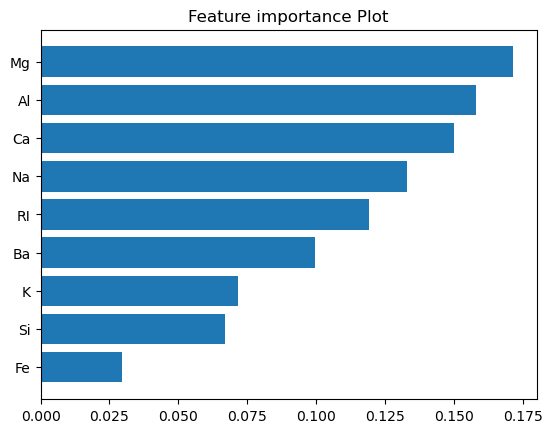

In [ ]:
plt.barh(df_imp['features'], df_imp['importance'])
plt.title('Feature importance Plot')
plt.show() 